In [2]:
import sys
sys.path.insert(0,'/home/zahradnik/PycharmProjects/master_thesis')

In [3]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
from src.modules import conf, df_columns    
from src.modules import conf, fit, evl, preprocess
import pandas as pd

/home/zahradnik/PycharmProjects/master_thesis/src/modules/__init__.py
/home/zahradnik/PycharmProjects/master_thesis


In [6]:
%load_ext autoreload
%autoreload 2

In [5]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [24, 8]
plt.rcParams['figure.dpi']

100.0

In [12]:
athlete_1 = pickle.load(open("src/models/zimola.sav", 'rb'))
athlete_2 = pickle.load(open("src/models/zahradnik.sav", 'rb'))

In [13]:
test_df = pd.read_csv("src/output/columns_in_model.csv")
len(test_df)

112

In [15]:
important_cols = ["enhanced_altitude","temp","rain","heart_rate","cadence","wind","snow","slope_ascent","slope_descent","dist_diff","peak"]

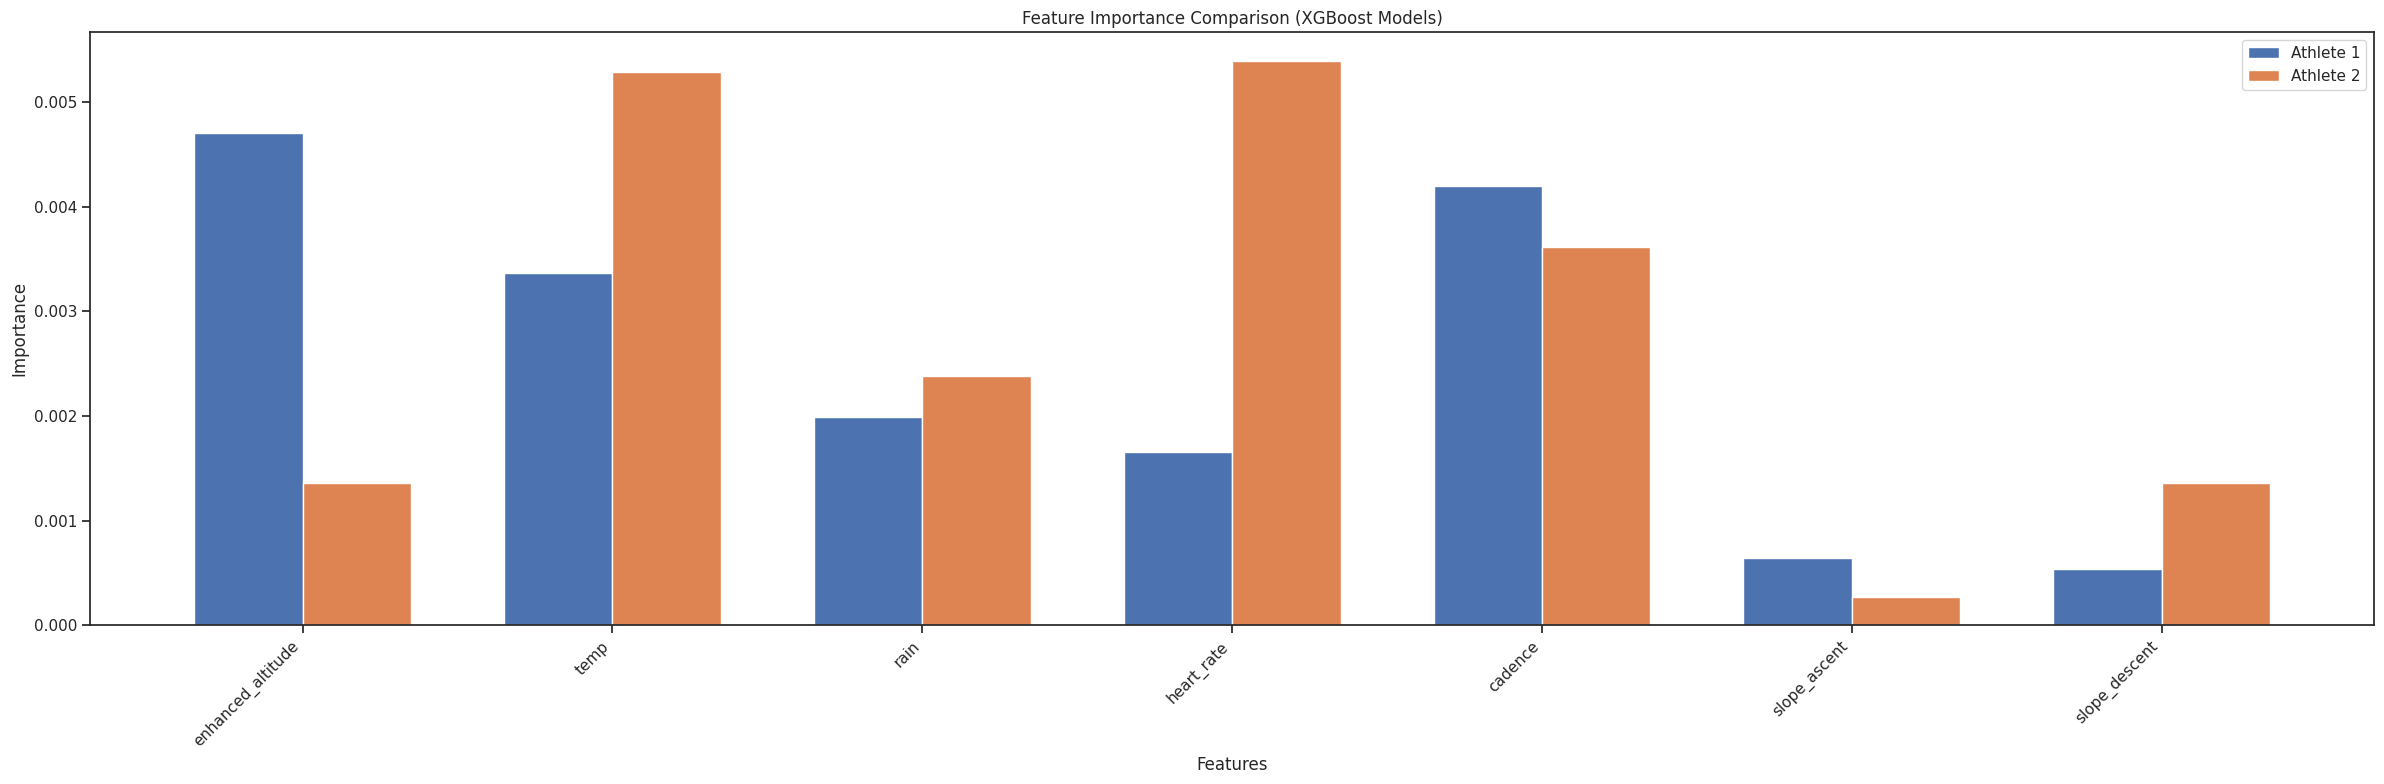

In [106]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming test_df is a DataFrame with your feature names
feature_names = test_df.col

# Get feature importances for each model
importances_model1 = athlete_1.feature_importances_
importances_model2 = athlete_2.feature_importances_

# Select only a subset of features
selected_features = ["enhanced_altitude","temp","rain","heart_rate","cadence","slope_ascent","slope_descent"]

# Get indices of selected features in the original feature names
selected_indices = [list(feature_names).index(feature) for feature in selected_features]

# Filter importances based on selected features
importances_model1_selected = importances_model1[selected_indices]
importances_model2_selected = importances_model2[selected_indices]

# Bar width
bar_width = 0.35

# Set up positions for bars
bar_positions_model1 = np.arange(len(selected_features))
bar_positions_model2 = bar_positions_model1 + bar_width

# Create the bar graph
plt.bar(bar_positions_model1, importances_model1_selected, width=bar_width, label='Athlete 1')
plt.bar(bar_positions_model2, importances_model2_selected, width=bar_width, label='Athlete 2')

# Set labels and title
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance Comparison (XGBoost Models)')
plt.xticks(bar_positions_model1 + bar_width / 2, selected_features, rotation=45, ha="right")
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


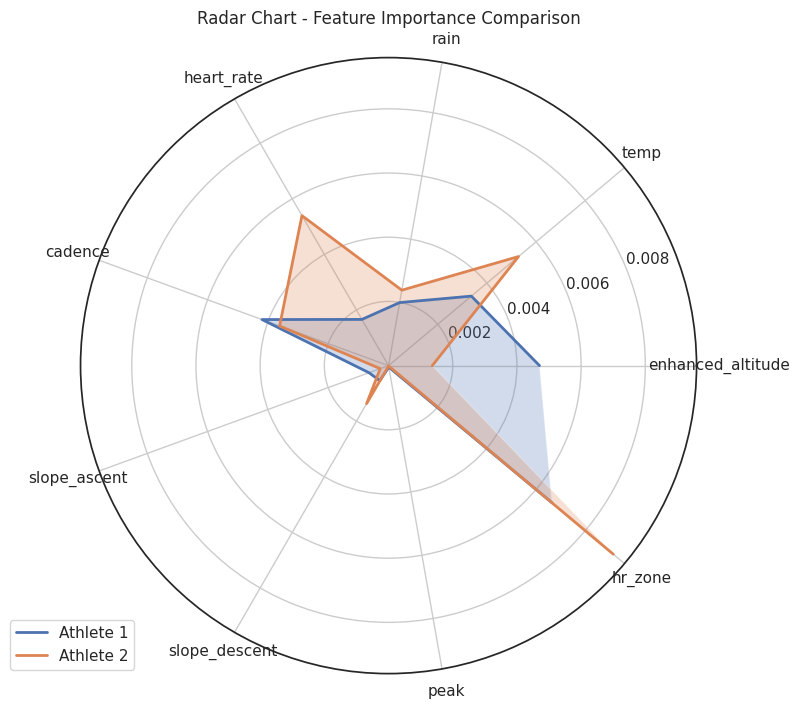

In [105]:
# Number of features
num_features = len(selected_features)

# Angle of each axis in the plot
angles = np.linspace(0, 2 * np.pi, num_features, endpoint=False)
# Make the plot circular
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# Plot each model's feature importances
ax.plot(angles, importances_model1_selected, label='Athlete 1', linewidth=2, linestyle='solid')
ax.fill(angles, importances_model1_selected, alpha=0.25)

ax.plot(angles, importances_model2_selected, label='Athlete 2', linewidth=2, linestyle='solid')
ax.fill(angles, importances_model2_selected, alpha=0.25)

# Set labels for each axis
ax.set_thetagrids(angles * 180/np.pi, selected_features)

# Add a legend
ax.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

# Show the plot
plt.title('Radar Chart - Feature Importance Comparison')
plt.show()

# 10km

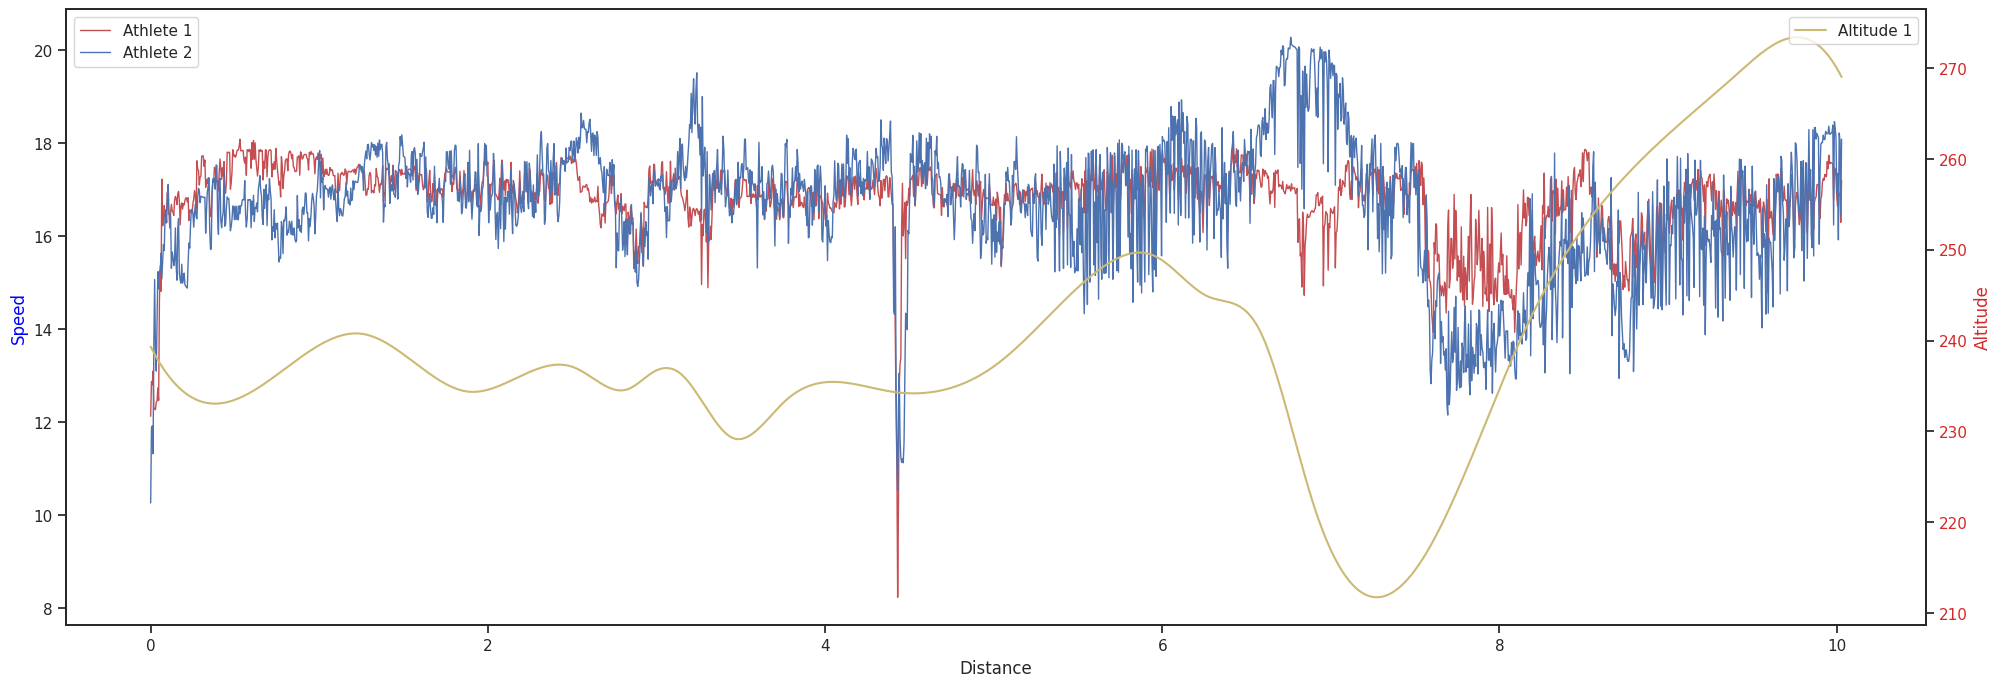

In [31]:
percent_delay = int(len(test_df) * 0.02)  ## 2% delay

pred_1 = pd.read_csv("src/output/zahradnik_bechovice.csv")
pred_2 = pd.read_csv("src/output/zimola_bechovice.csv")
speed_plot = plot_compare(df=pred_1,pred1 = pred_1["enhanced_speed"], pred2 = pred_2["enhanced_speed"],spline=False)

# Hradec

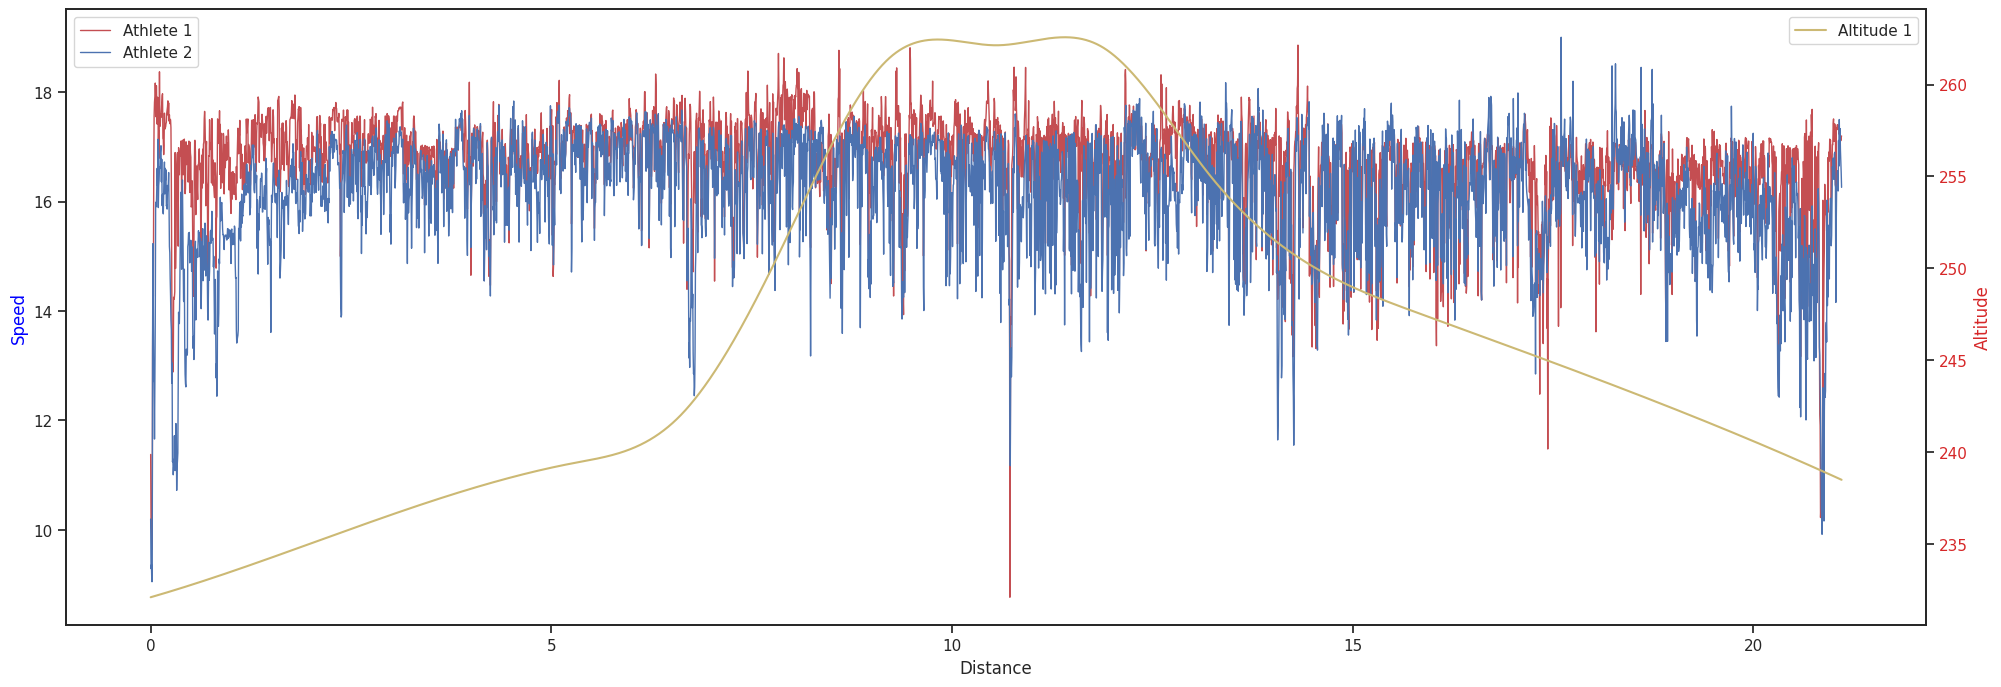

In [107]:
percent_delay = int(len(test_df) * 0.02)  ## 2% delay

pred_1 = pd.read_csv("src/output/zahradnik_hradec.csv")
pred_2 = pd.read_csv("src/output/zimola_hradec.csv")
speed_plot = plot_compare(df=pred_1,pred1 = pred_1["enhanced_speed"], pred2 = pred_2["enhanced_speed"])

# Marathon

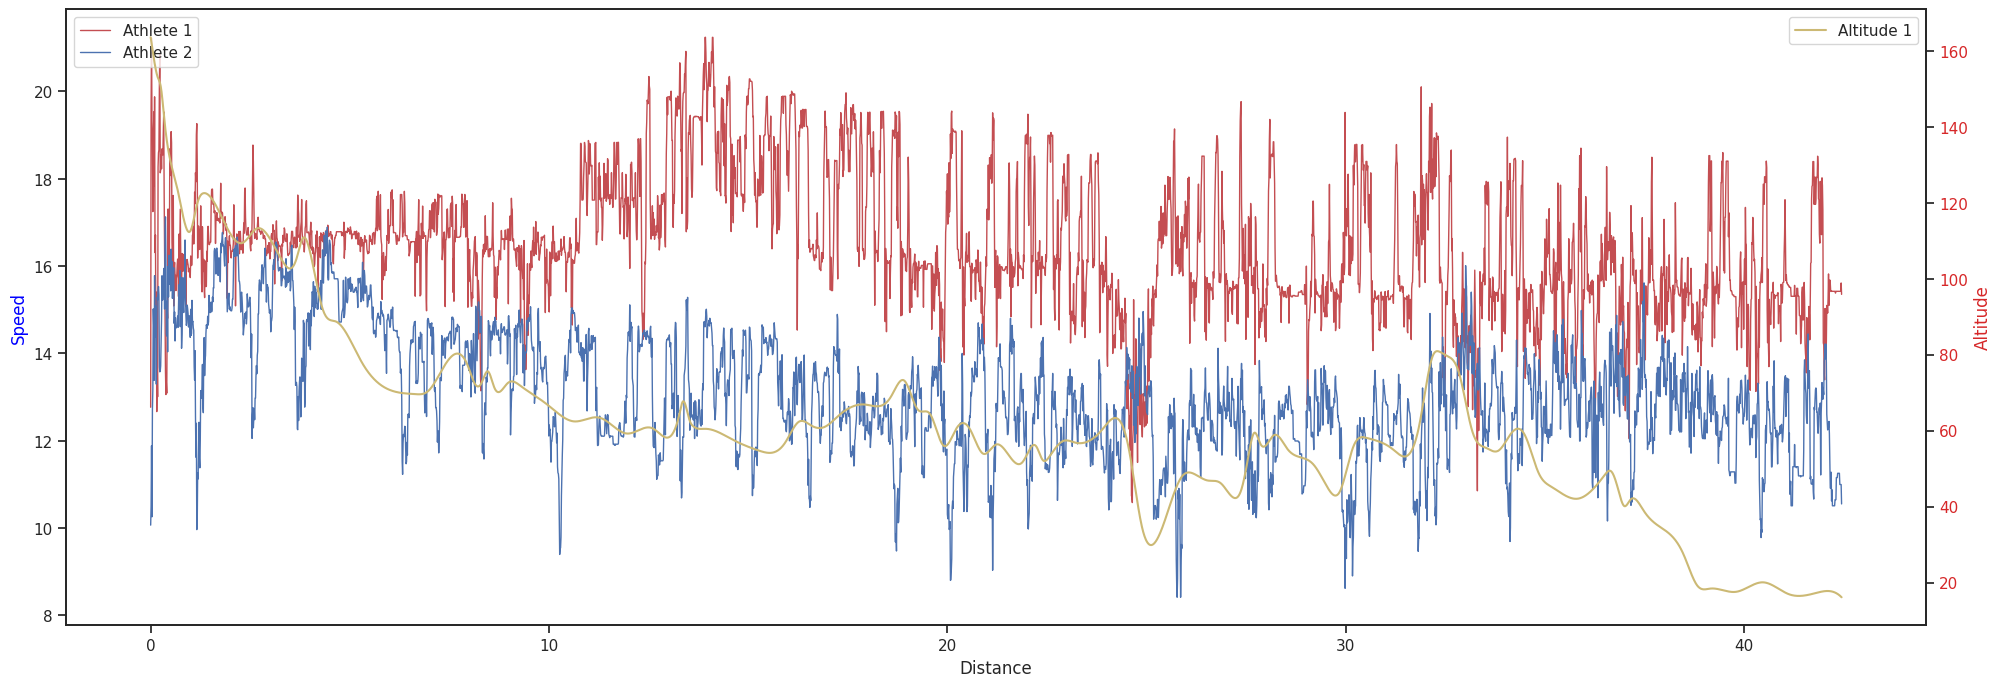

In [111]:
percent_delay = int(len(test_df) * 0.02)  ## 2% delay

pred_1 = pd.read_csv("src/output/zahradnik_boston.csv")
pred_2 = pd.read_csv("src/output/zimola_boston.csv")
speed_plot = plot_compare(df=pred_1,pred1 = pred_1["enhanced_speed"], pred2 = pred_2["enhanced_speed"])

In [114]:
import math

# np.mean(speed_test), np.mean(y_pred_ridge), max(test_df.distance)
time = ((np.max(pred_2.distance) / 1000) / np.mean(pred_2["enhanced_speed"])) * 60
minutes = math.floor(time)
seconds = round((time - minutes) * 60)
if seconds == 60:
    seconds=0
    minutes+=1
final_time = f'Final time: {minutes}:{seconds}'
f'Final time: {minutes}:{seconds}'

'Final time: 194:55'

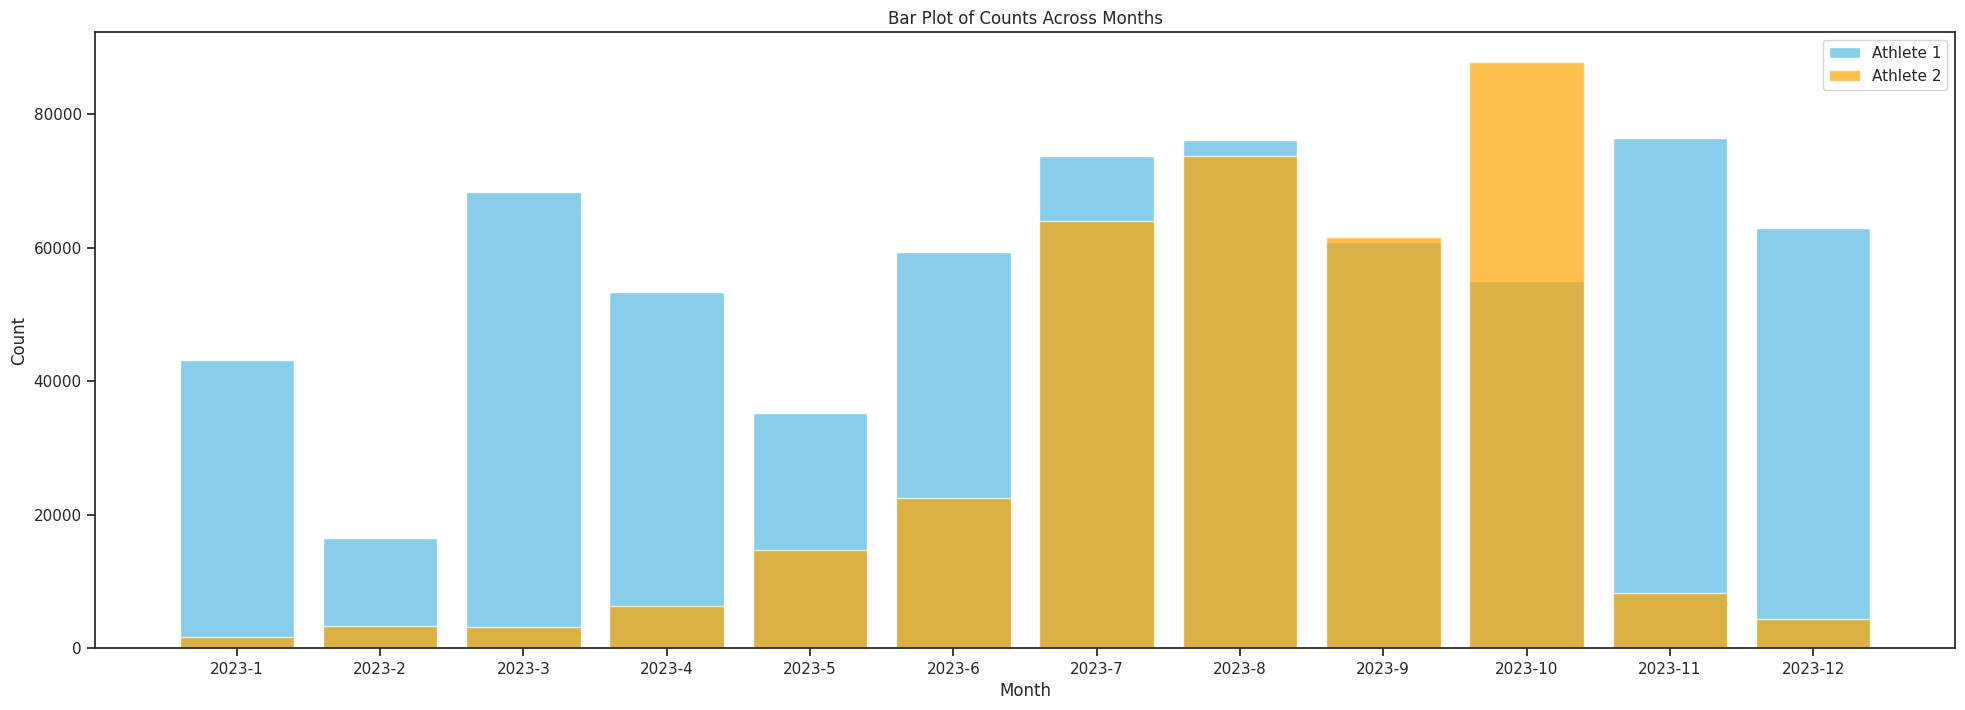

In [100]:
import matplotlib.pyplot as plt

# Assuming you have two dataframes: athlete_1_df and athlete_2_df
months_athlete_1 = athlete_1_df["date_month"].drop_duplicates().sort_values()
months_athlete_2 = athlete_2_df["date_month"].drop_duplicates().sort_values()

# Plotting data from the first dataframe
plt.bar(months_athlete_1, 
        athlete_1_df.iloc[:, 1], 
        color='skyblue', label='Athlete 1')

# Plotting data from the second dataframe
plt.bar(months_athlete_2, 
        athlete_2_df.iloc[:, 1], 
        color='orange', label='Athlete 2', alpha=0.7)

months_combined = ['2023-' + str(month) for month in months_athlete_1]

# Setting the x-axis labels
plt.xticks(months_athlete_1, months_combined)
plt.title('Bar Plot of Counts Across Months')
plt.xlabel('Month')
plt.ylabel('Count')

# Adding legend
plt.legend()

plt.show()


In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate
import seaborn as sns
import base64
from io import BytesIO
import scipy.interpolate
def plot_compare(df: pd.DataFrame, pred1: list, pred2: list, ylabel="Speed", color1="blue", color2="red", spline=False,lwidth=1):
    """
    Plot graph with difference between true values and predicted values.
    :param df: tested dataframe
    :param pred1: predicted values for the first dataframe
    :param pred2: predicted values for the second dataframe
    :param lwidth: line width
    """
    fig, ax1 = plt.subplots()
    ax1.set_xlabel("Distance")
    ax1.set_ylabel(ylabel, color=color1)

    x = np.linspace(min(df.distance)/1000, max(df.distance)/1000, len(pred1))
    
    # Interpolate using spline for the first dataframe
    spl1 = scipy.interpolate.UnivariateSpline(x, df.enhanced_altitude)
    altitude1 = spl1(x)
        
    ax1.plot(x, pred1, "r", label="Athlete 1", linewidth=lwidth)
    
    ax1.plot(x, pred2, "b", label="Athlete 2", linewidth=lwidth)

    ax2 = ax1.twinx()
    color2 = "tab:" + color2
    ax2.set_ylabel("Altitude", color=color2)
    ax2.plot(x, altitude1, "y", label="Altitude 1")
    ax2.tick_params(axis="y", labelcolor=color2)


    sns.set(style="ticks")
    ax1.legend(loc="upper left")
    ax2.legend(loc="upper right")

    buffer = BytesIO()
    plt.savefig(buffer, format='png')
    buffer.seek(0)
    plot = base64.b64encode(buffer.getvalue()).decode()
    buffer.close()

    return plot

# Example usage:
# plot(df, pred1, pred2, ylabel="Your Y-label", color1="blue", color2="green", true_data1=[], true_data2=[])


In [1]:
from src.modules import compare
compare.load_reference_model()

/home/zahradnik/PycharmProjects/master_thesis/src/modules/__init__.py
/home/zahradnik/PycharmProjects/master_thesis
